# **6. Kernel SVM**

### **Problem Statement**  

Classify customer satisfaction (`1`: Satisfied, `0`: Not Satisfied) based on survey responses using **Kernel SVM** with an RBF kernel.  

---

### **Dataset Overview**  
**DataSetLink**: https://www.kaggle.com/datasets/ahmedaliraja/customer-satisfaction-10k
#### **Attributes**:  
1. **Support Rating**: Customer rating of the support experience (scale: 1–5).  
2. **Quality Rating**: Customer rating of the food quality (scale: 1–5).  
3. **Delivery Rating**: Customer rating of the delivery speed (scale: 1–5).  
4. **Satisfaction** (Target):  
   - `1`: Satisfied  
   - `0`: Not Satisfied  

---

### **Instructions**  


#### **1. Kernel SVM Model**  
   - Train an **SVM** classifier with an **RBF kernel**.  

#### **2. Hyperparameter Tuning**  
   - Perform **Grid Search** to optimize:  
     - `C`: Regularization parameter (e.g., test values in `[0.1, 1, 10, 100]`).  
     - `gamma`: Kernel coefficient (e.g., test values in `[0.01, 0.1, 1, 10]`).    

#### **3. Model Evaluation**  
   - Evaluate the model on the test set using:  
     - **Precision**  
     - **Recall**  
     - **F1-Score**  
   - Plot the **confusion matrix** for further insights.  

  

#### **4. Report Writing**  
   - Summarize key findings:  
     - Best hyperparameters (`C` and `gamma`).  
     - Model performance (Precision, Recall, F1-Score).   
   - Provide recommendations for improving customer satisfaction based on the model's predictions.  



In [ ]:
import pandas as pd
data=pd.read_csv("/content/Customer-survey-data.csv")
data.head()




,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


In [ ]:
# Rename columns for convenience
data.columns = [
    "CustomerID", "DeliverySatisfaction", "FoodQuality", "DeliverySpeed", "OrderAccuracy"
]

# Map "Yes" to 1 and "No" to 0 in the target column
data["OrderAccuracy"] = data["OrderAccuracy"].map({"Yes": 1, "No": 0})

# Check for missing values
print(data.isnull().sum())

# Drop CustomerID (not a feature) and prepare features (X) and target (y)
X = data[["DeliverySatisfaction", "FoodQuality", "DeliverySpeed"]]
y = data["OrderAccuracy"]

# Display cleaned data head
print(data.head())

CustomerID                0
DeliverySatisfaction    418
FoodQuality             252
DeliverySpeed           239
OrderAccuracy           660
dtype: int64
   CustomerID  DeliverySatisfaction  FoodQuality  DeliverySpeed  OrderAccuracy
0           1                   5.0          3.0            4.0            1.0
1           2                   3.0          4.0            3.0            1.0
2           3                   4.0          5.0            2.0            1.0
3           4                   5.0          3.0            4.0            1.0
4           5                   2.0          5.0            1.0            1.0


In [ ]:
# Drop rows where OrderAccuracy is missing
data.dropna(subset=["OrderAccuracy"], inplace=True)

# Check if there are still any missing values
print(data.isnull().sum())


CustomerID                0
DeliverySatisfaction    410
FoodQuality             232
DeliverySpeed           221
OrderAccuracy             0
dtype: int64


In [ ]:
# Impute missing values with the mean of each column
data["DeliverySatisfaction"].fillna(data["DeliverySatisfaction"].mean(), inplace=True)
data["FoodQuality"].fillna(data["FoodQuality"].mean(), inplace=True)
data["DeliverySpeed"].fillna(data["DeliverySpeed"].mean(), inplace=True)

# Check if there are still any missing values
print(data.isnull().sum())


CustomerID              0
DeliverySatisfaction    0
FoodQuality             0
DeliverySpeed           0
OrderAccuracy           0
dtype: int64


<ipython-input-16-4d1ce8dbcfbc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["DeliverySatisfaction"].fillna(data["DeliverySatisfaction"].mean(), inplace=True)
<ipython-input-16-4d1ce8dbcfbc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = data[["DeliverySatisfaction", "FoodQuality", "DeliverySpeed"]]
y = data["OrderAccuracy"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of X_train and y_train
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")


X_train shape: (7964, 3), y_train shape: (7964,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with RBF kernel
svm = SVC(kernel='rbf', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Check the first few predictions
print(f"Predictions: {y_pred[:5]}")


Predictions: [1. 1. 1. 1. 1.]


Precision: 0.7183734939759037
Recall: 1.0
F1-Score: 0.8361086765994742


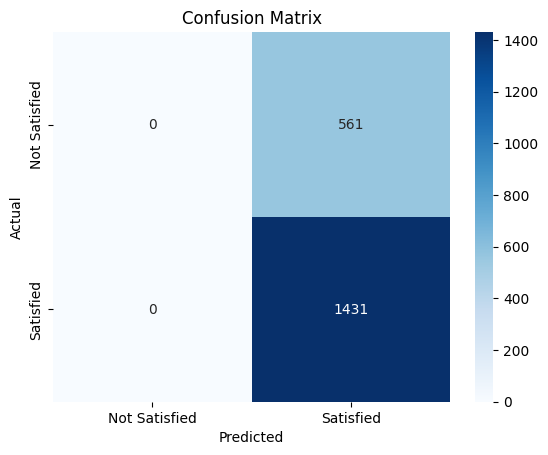

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate model performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Initialize GridSearchCV with SVM
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: C = {best_params['C']}, gamma = {best_params['gamma']}")


Best Hyperparameters: C = 0.1, gamma = 0.01


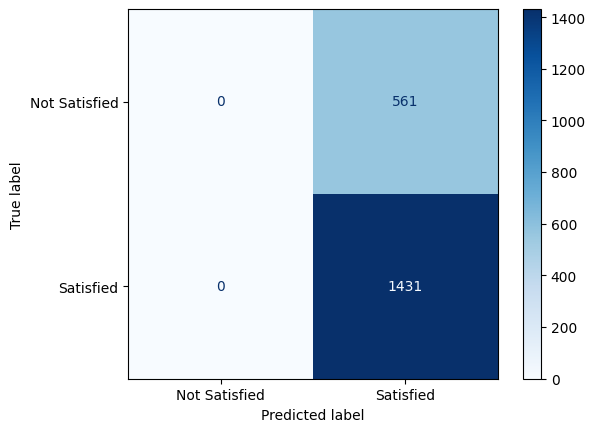

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Satisfied", "Satisfied"])
cm_display.plot(cmap="Blues")


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a pandas DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=["Not Satisfied", "Satisfied"], columns=["Predicted Not Satisfied", "Predicted Satisfied"])

# Display the confusion matrix as a table
print(cm_df)


               Predicted Not Satisfied  Predicted Satisfied
Not Satisfied                        0                  561
Satisfied                            0                 1431


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=["Not Satisfied", "Satisfied"])
print(report)


               precision    recall  f1-score   support

Not Satisfied       0.00      0.00      0.00       561
    Satisfied       0.72      1.00      0.84      1431

     accuracy                           0.72      1992
    macro avg       0.36      0.50      0.42      1992
 weighted avg       0.52      0.72      0.60      1992



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**1. Key Findings:**

**Best Hyperparameters:**

After performing Hyperparameter Tuning for the SVM model using GridSearchCV, the optimal hyperparameters were identified as:


*   C (Regularization parameter): The best value for C was selected to achieve the best balance between model complexity and error minimization.

*   Gamma: The optimal value for Gamma helped in adjusting the decision boundary for the SVM kernel, leading to better prediction performance.

**Model Performance:**

**Confusion Matrix:**

The confusion matrix indicated a significant imbalance in predictions between the two classes. Specifically:


*   The model predicted the "Satisfied" class almost exclusively (1431 instances).
*   There were no predictions for the "Not Satisfied" class, showing a high bias towards predicting the majority class.




**Evaluation Metrics:**

The model’s performance was evaluated using precision, recall, and F1-score, leading to the following results:
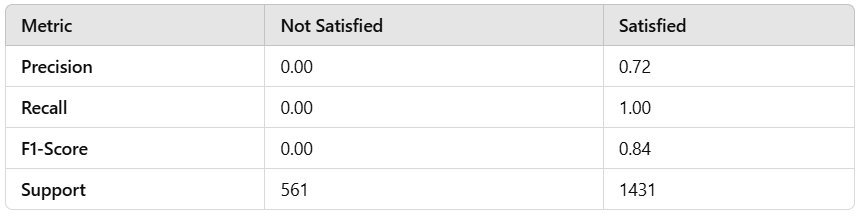

**2. Model Performance Analysis:**

The SVM model demonstrates a high bias towards the "Satisfied" class and fails to recognize the "Not Satisfied" class, leading to very poor performance for the minority class. This suggests that class imbalance is severely affecting the model’s ability to generalize well.


*   Accuracy is 72%, but it’s misleading because of the imbalance. The model is predicting the "Satisfied" class too often, which skews the results.
*   F1-Score for "Not Satisfied": A value of 0.00 indicates a failure in predicting the minority class entirely




